### K means Clustering

#### Sathvik K P - 1MS17CS143
#### Sathvik B - 1MS17CS148

##### Import necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### Load the dataset

In [2]:
data = pd.read_csv("/content/drive/My Drive/Datasets/abcnews-date-text.csv",error_bad_lines=False)
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


##### Convert publish_date into year, month and day for Exploratory Data Analysis

In [0]:
data['publish_year'] = data['publish_date'].apply(lambda x:int(x/10000))
data['publish_month'] = data['publish_date'].apply(lambda x:int(((x)%10000)/100))
data['publish_day'] = data['publish_date'].apply(lambda x:((x)%10000)%100)

A plot of nummber of news headlines in each year

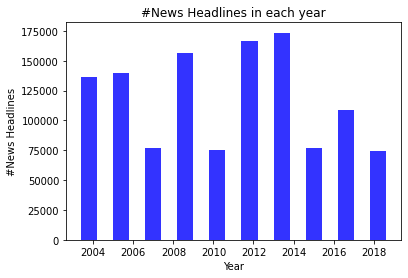

In [4]:
import matplotlib.pyplot as plt
plt.hist(data['publish_year'], facecolor='blue', alpha=0.8, rwidth = 0.5)
plt.xlabel('Year')
plt.ylabel('#News Headlines')
plt.title('#News Headlines in each year')
plt.show()

Number of headlines in each month

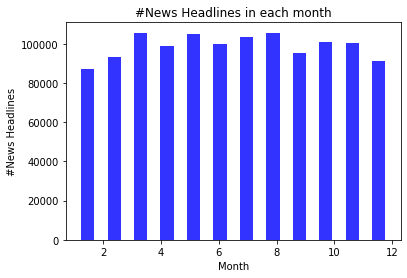

In [5]:
plt.hist(data['publish_month'],12, facecolor='blue', alpha=0.8, rwidth = 0.5)
plt.xlabel('Month')
plt.ylabel('#News Headlines')
plt.title('#News Headlines in each month')
plt.show()

##### Number of News Headlines on each day of month

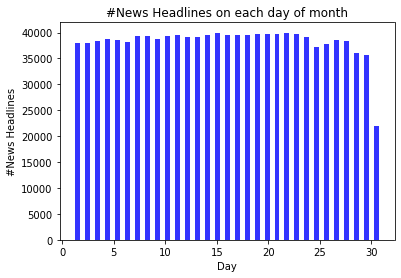

In [6]:
plt.hist(data['publish_day'],31, facecolor='blue', alpha=0.8, rwidth = 0.5)
plt.xlabel('Day')
plt.ylabel('#News Headlines')
plt.title('#News Headlines on each day of month')
plt.show()

##### Sampling the data to 10,000 values (otherwise, there will be very high computation time)

In [0]:
data = data[:10000]

In [0]:
data = data[["headline_text"]]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   headline_text  10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


##### Removing duplicate headlines

In [10]:
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(8)

,headline_text
9253,5 australian sars cases being monitored
9458,5 australian sars cases being monitored
6402,all walks of life follow protest path
6192,all walks of life follow protest path
6197,asio briefs crean on terrorist risk
6409,asio briefs crean on terrorist risk
6609,australia celebrates world cup victory
6813,australia celebrates world cup victory


In [0]:
data = data.drop_duplicates('headline_text')

##### TF-IDF and vectorization

In [0]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['headline_text'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [13]:
word_features = vectorizer.get_feature_names()
print(len(word_features))

9820


##### Performing stemming

In [0]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [15]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


6909


In [16]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 100)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [17]:
X3

<9967x100 sparse matrix of type '<class 'numpy.float64'>'
	with 11385 stored elements in Compressed Sparse Row format>

##### Elbow method to select number of clusters

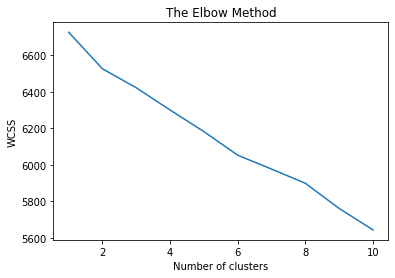

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

##### Number of clusters =3

In [19]:
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : war, govt, man, council, charg, world, face, court, protest, anti, cup, murder, polic, vic, plan, urg, nsw, say, claim, fund, qld, consid, death, howard, miss
1 : polic, new, plan, win, iraqi, say, claim, warn, kill, report, baghdad, water, nsw, urg, death, fund, crash, lead, continu, hope, set, rain, troop, forc, open
2 : iraq, war, say, missil, troop, howard, deni, pm, bomb, report, forc, warn, attack, kill, coalit, aust, baghdad, oil, support, claim, secur, australia, defend, australian, saddam


##### Silhouette score lies between 1 and -1, with 1 being the best and -1 being the worst

In [20]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X3, labels=kmeans.predict(X3)))

0.1817126543809907


##### Number of clusters = 5

In [21]:
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : iraq, war, say, missil, troop, howard, deni, pm, bomb, report, forc, warn, attack, kill, coalit, aust, baghdad, oil, support, claim, secur, australia, defend, australian, saddam
1 : polic, probe, man, arrest, investig, death, murder, charg, wa, car, protest, miss, new, crash, vic, seek, help, court, urg, kill, welcom, nsw, secur, face, continu
2 : govt, win, man, new, iraqi, say, claim, charg, warn, report, kill, baghdad, world, court, nsw, urg, face, fund, death, water, set, cup, lead, crash, hope
3 : plan, council, water, welcom, new, fund, elect, seek, chang, govt, secur, consid, begin, urg, offer, concern, meet, group, qld, claim, green, say, protest, health, air
4 : war, anti, protest, howard, pm, iraqi, say, plan, open, oil, end, warn, urg, australia, deni, forc, green, world, begin, govt, union, troop, new, air, continu


In [22]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X3, labels=kmeans.predict(X3)))

0.20250434732565156


##### Number of clusters = 6

In [23]:
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : council, secur, elect, plan, fund, seek, welcom, consid, water, chang, urg, offer, claim, meet, iraq, qld, help, concern, new, hope, say, make, begin, continu, boost
1 : govt, vic, nsw, urg, fund, wa, qld, claim, consid, say, deni, defend, plan, hospit, report, new, offer, drought, health, help, iraq, boost, support, war, open
2 : polic, man, win, new, iraqi, say, charg, claim, warn, kill, report, baghdad, court, world, death, face, nsw, water, crash, urg, set, cup, lead, continu, fund
3 : iraq, say, missil, troop, deni, pm, bomb, howard, report, attack, kill, forc, coalit, warn, baghdad, oil, aust, claim, australian, new, ban, support, australia, miss, saddam
4 : plan, water, new, protest, welcom, begin, defend, health, group, green, meet, union, world, war, farmer, polic, concern, say, hospit, fund, chang, support, wa, iraqi, air
5 : war, anti, iraq, protest, howard, pm, say, iraqi, warn, forc, end, deni, plan, open, oil, australia, green, world, urg, troop, arrest, begin, new, a

In [24]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X3, labels=kmeans.predict(X3)))

0.21016285997105688


#### As we can see, we get the best results with number of clusters = 6